In [40]:
import numpy as np 
import pandas as pd

np.random.seed(10)

data={'年齢': np.random.normal(loc=40,scale=30,size=30),
      '性別': np.random.choice(['男性','女性'],size=30),
      '身長': np.random.normal(loc=165,scale=20,size=30),
      '体重': np.random.normal(loc=60,scale=15,size=30)
      }

df=pd.DataFrame(data)

df.to_csv('/Users/miyoshimao/DL基礎/python_practice/test1.csv',index=False)

df=pd.read_csv('/Users/miyoshimao/DL基礎/python_practice/test1.csv')

print(df.describe())

df['性別code'] = pd.Categorical(df['性別']).codes
#print(df)

for col in df.select_dtypes(include='number').columns.tolist():
    print(f'{col} 平均: {np.mean(df[col])}, 最小:{np.min(df[col])}, 最大:{np.max(df[col])}, 標準偏差:{np.std(df[col])}')

print(df.describe())


               年齢          身長         体重
count   30.000000   30.000000  30.000000
mean    45.939742  160.342295  62.059442
std     31.637432   21.406433  17.340396
min    -19.331848  129.028540  32.029179
25%     32.587419  143.677615  51.680215
50%     47.412126  157.880377  58.019484
75%     68.500759  171.955861  69.262596
max    111.549020  215.466102  99.317288
年齢 平均: 45.93974175295831, 最小:-19.331848419737213, 最大:111.5490199213329, 標準偏差:31.105672365822564
身長 平均: 160.34229512159342, 最小:129.02853951818622, 最大:215.46610170198835, 標準偏差:21.046635686870967
体重 平均: 62.05944152677618, 最小:32.02917919468682, 最大:99.3172877731323, 標準偏差:17.048940061435065
性別code 平均: 0.6333333333333333, 最小:0, 最大:1, 標準偏差:0.4818944098266986
               年齢          身長         体重     性別code
count   30.000000   30.000000  30.000000  30.000000
mean    45.939742  160.342295  62.059442   0.633333
std     31.637432   21.406433  17.340396   0.490133
min    -19.331848  129.028540  32.029179   0.000000
25%     32.587419 

In [8]:
df=pd.read_csv('/Users/miyoshimao/DL基礎/python_practice/test1.csv')
df.columns.tolist()

print(df[df['年齢']>=60])
print(df[(df['身長']>=160)&(df['体重']>=70)])
print(df.sort_values(by='身長',ascending=False))

            年齢  性別          身長         体重
0    79.947595  女性  157.754964  45.074385
1    61.458369  男性  142.417375  99.317288
11   76.091121  男性  166.929247  57.185325
13   70.848222  男性  160.564751  84.262622
18   84.536110  女性  136.802623  90.752373
23  111.549020  男性  136.738640  51.097818
24   73.710738  男性  215.466102  53.427407
25   90.178666  男性  171.946356  64.221491
27   81.939891  男性  143.807655  85.041777
           年齢  性別          身長         体重
8   40.128743  男性  166.575769  99.286878
13  70.848222  男性  160.564751  84.262622
            年齢  性別          身長         体重
24   73.710738  男性  215.466102  53.427407
22   47.982105  男性  201.170864  41.404791
4    58.640079  女性  190.645534  66.494393
19    7.605853  男性  190.047972  62.186610
9    34.761994  女性  183.368273  69.953894
6    47.965348  女性  176.553161  32.029179
20  -19.331848  女性  174.391255  48.757647
28   31.862560  女性  171.959029  43.846723
25   90.178666  男性  171.946356  64.221491
21  -12.301169  男性  171.538433  55.34

In [14]:
print(df.groupby('性別')['年齢'].sum())
print(df.groupby('性別')[['身長', '体重']].mean())
print(df.groupby('性別').size())

性別
女性    484.073234
男性    894.119018
Name: 年齢, dtype: float64
            身長         体重
性別                       
女性  160.717537  60.383504
男性  160.125050  63.029721
性別
女性    11
男性    19
dtype: int64


In [15]:
df.groupby('性別')

In [16]:
# 性別ごとの年齢の平均
df.pivot_table(values='年齢', index='性別', aggfunc='mean')


,年齢
性別,
女性,44.006658
男性,47.058896


In [20]:
print(df.pivot_table(values=['年齢','体重'], index='性別', aggfunc=['mean', 'std']))


         mean                   std           
           体重         年齢         体重         年齢
性別                                            
女性  60.383504  44.006658  17.812788  29.636988
男性  63.029721  47.058896  17.477370  33.481730


In [26]:
df['年齢カテゴリ'] = df['年齢'].apply(lambda x: '40↑' if x >= 40 else '40↓')
pd.crosstab(index=df['性別'],columns=df['年齢カテゴリ'], margins=True)

年齢カテゴリ,40↑,40↓,All
性別,,,
女性,7,4,11
男性,13,6,19
All,20,10,30


In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

# ノートブックなら以下を書くとグラフが表示されやすい（VSCodeでもOK）
%matplotlib inline


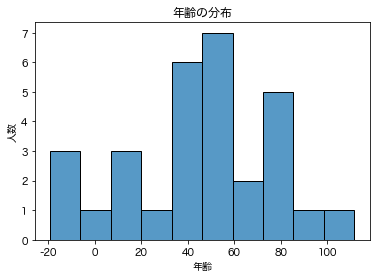

In [51]:
sns.histplot(df['年齢'], bins=10)
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Osaka'  # or 'Hiragino Sans'
plt.title("年齢の分布")
plt.xlabel("年齢")
plt.ylabel("人数")
plt.show()


In [41]:
df

,年齢,性別,身長,体重,性別code
0,79.947595,女性,157.754964,45.074385,0
1,61.458369,男性,142.417375,99.317288,1
2,-6.362009,男性,158.005790,54.886704,1
3,39.748485,男性,143.945470,57.568588,1
4,58.640079,女性,190.645534,66.494393,0
5,18.397433,男性,161.563892,59.932598,1
6,47.965348,女性,176.553161,32.029179,0
7,43.256456,女性,135.500502,50.884112,0
8,40.128743,男性,166.575769,99.286878,1
9,34.761994,女性,183.368273,69.953894,0


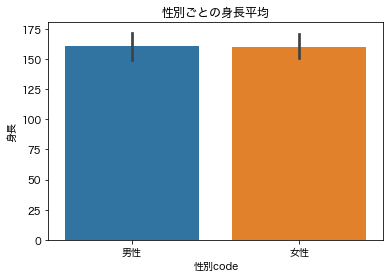

In [57]:
plt.rcParams['font.family'] = 'Hiragino Sans'
sns.barplot(x='性別code', y='身長', data=df)
plt.xticks(ticks=[0, 1], labels=["男性", "女性"])
plt.title("性別ごとの身長平均")
plt.show()


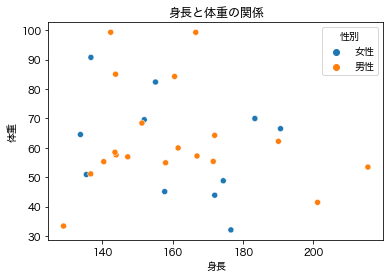

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'Hiragino Sans'
plt.rcParams['axes.unicode_minus'] = False

sns.scatterplot(x='身長', y='体重', hue='性別', data=df)
plt.title("身長と体重の関係")
plt.xlabel("身長")
plt.ylabel("体重")
plt.show()


In [58]:
df.describe()

,年齢,身長,体重,性別code
count,30.000000,30.000000,30.000000,30.000000
mean,45.939742,160.342295,62.059442,0.633333
std,31.637432,21.406433,17.340396,0.490133
min,-19.331848,129.028540,32.029179,0.000000
25%,32.587419,143.677615,51.680215,0.000000
50%,47.412126,157.880377,58.019484,1.000000
75%,68.500759,171.955861,69.262596,1.000000
max,111.549020,215.466102,99.317288,1.000000


In [59]:
print(df.groupby('性別')[['身長', '体重']].mean())

            身長         体重
性別                       
女性  160.717537  60.383504
男性  160.125050  63.029721


<AxesSubplot:xlabel='年齢', ylabel='Count'>

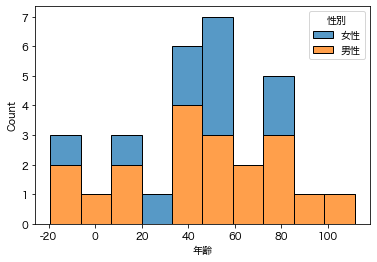

In [68]:
sns.histplot(data=df,x='年齢', hue='性別',bins=10,multiple='stack')